<a href="https://colab.research.google.com/github/Joaosantos3/Data-Science/blob/main/DATA-SCIENCE-FINANCAS-CARTEIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTAÇÃO DE BBT

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ! pip install pycryptodome pycryptodomex
# !pip uninstall crypto
# !pip uninstall pycrypto
# !pip install pycryptodome
!pip uninstall --yes pandas-datareader
!pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316
!pip install yfinance

from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

import pandas as pd
from pandas_datareader import data as wb

!pip install xlsxwriter
import xlsxwriter

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'

Found existing installation: pandas-datareader 0+untagged.811.gea66d6b
Uninstalling pandas-datareader-0+untagged.811.gea66d6b:
  Successfully uninstalled pandas-datareader-0+untagged.811.gea66d6b
  Cloning https://github.com/raphi6/pandas-datareader.git (to revision ea66d6b981554f9d0262038aef2106dda7138316) to /tmp/pip-req-build-44_eertz
  Running command git clone --filter=blob:none --quiet https://github.com/raphi6/pandas-datareader.git /tmp/pip-req-build-44_eertz
  Running command git rev-parse -q --verify 'sha^ea66d6b981554f9d0262038aef2106dda7138316'
  Running command git fetch -q https://github.com/raphi6/pandas-datareader.git ea66d6b981554f9d0262038aef2106dda7138316
  Running command git checkout -q ea66d6b981554f9d0262038aef2106dda7138316
  Resolved https://github.com/raphi6/pandas-datareader.git to commit ea66d6b981554f9d0262038aef2106dda7138316
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-datareader: filename=pandas_datareader-0+untagged.811.gea66d6b-py

# ESCOLHA DE CARTEIRA, DATA

In [19]:
start_date=input("Data:")

Data:2023-01-01


In [20]:
from datetime import datetime
end=datetime.now().strftime('%Y-%m-%d')
print(start_date)
print(end)
days = np.busday_count(start_date, end)
days

2023-01-01
2023-06-28


127

In [21]:
carteira=['SUZB3.SA','ABEV3.SA','WEGE3.SA','^BVSP']

In [22]:
d = {name: pd.DataFrame() for name in carteira}

In [23]:
for df_name in list(d.keys()):
  # d[df_name]=wb.DataReader(df_name,data_source='yahoo',start=start_date)
  d[df_name] = pdr.get_data_yahoo(df_name,start=start_date,end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, '^BVSP')

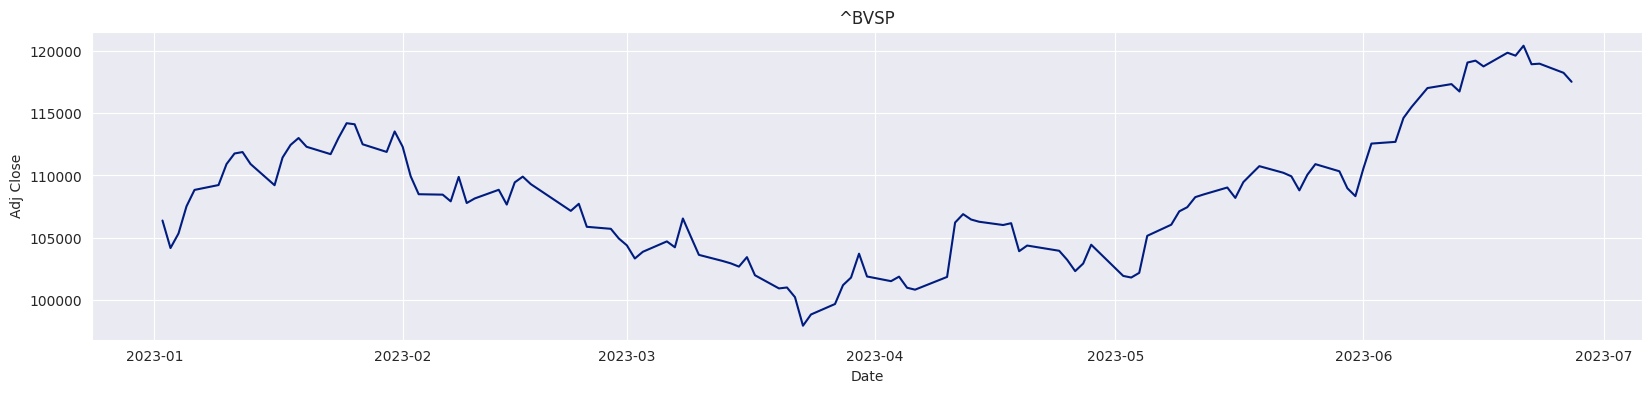

In [24]:
name='^BVSP'#"BDRX.SA" #"^GSPC"
sns.set_palette('dark')
sns.set_style(style='darkgrid')
fig1,ax1=plt.subplots(figsize=(20,4))
ax1=sns.lineplot(data=d[name],y='Adj Close',x=d[name].index)
ax1.set_title(name)

In [25]:
#NORMALIZANDO PARA 100
for df_name in list(d.keys()):
  d[df_name]['Adj Close']=d[df_name]['Adj Close']/d[df_name]['Adj Close'].iloc[0]

            SUZB3.SA  ABEV3.SA  WEGE3.SA     ^BVSP
Date                                              
2023-01-02  1.000000  1.000000  1.000000  1.000000
2023-01-03  1.017762  0.998591  0.975066  0.979225
2023-01-04  1.019804  1.004228  0.981627  0.990205
2023-01-05  1.026133  1.007047  0.983727  1.010736
2023-01-06  1.019600  1.009161  0.998163  1.023126


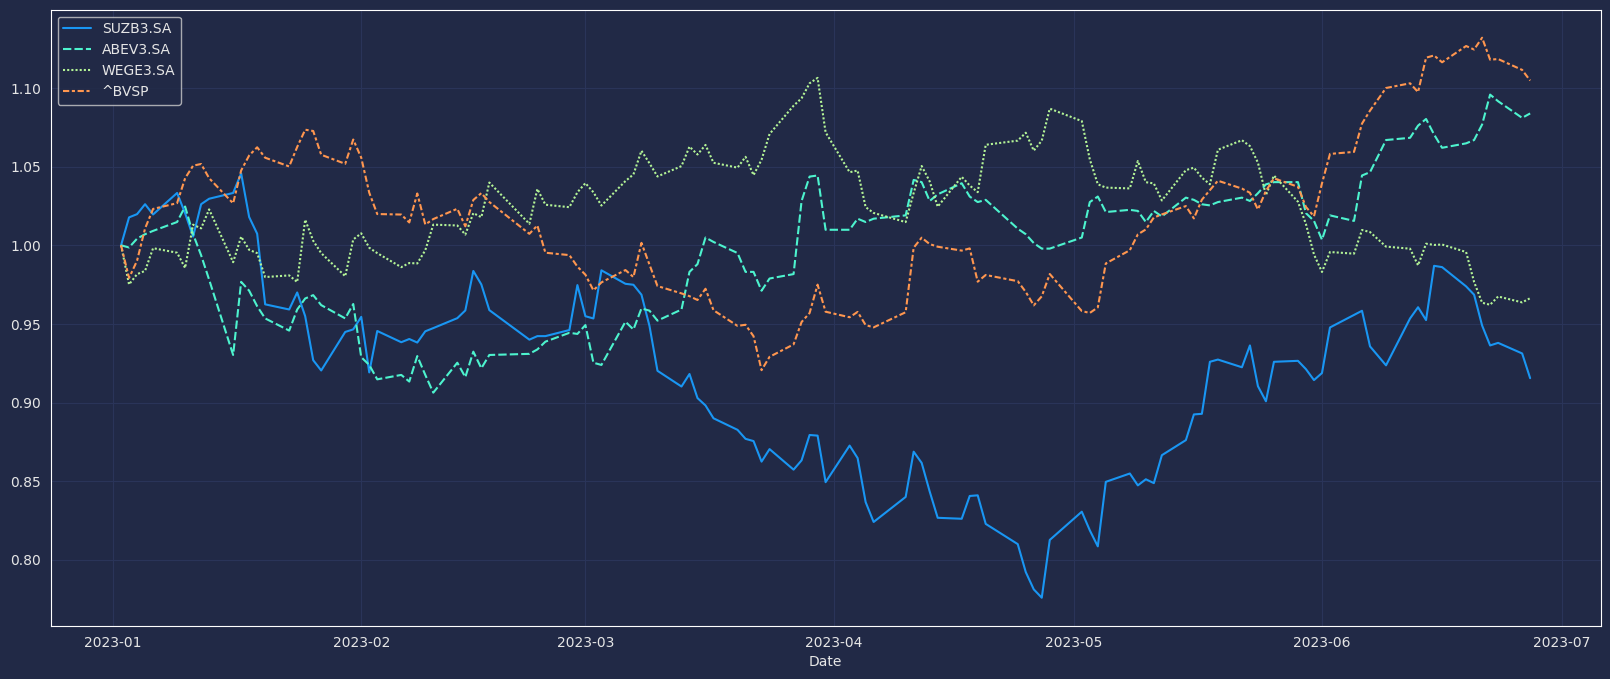

In [27]:
data_portifolio=pd.DataFrame()
for df_name in list(d.keys()):
  data_portifolio[df_name]=d[df_name]['Adj Close']

print(data_portifolio.head())
print('======================================================================================================')

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'
fig2,ax2=plt.subplots(figsize=(20,8))
ax2.grid(color='#2A3459')
ax2=sns.lineplot(data=data_portifolio,palette='rainbow')

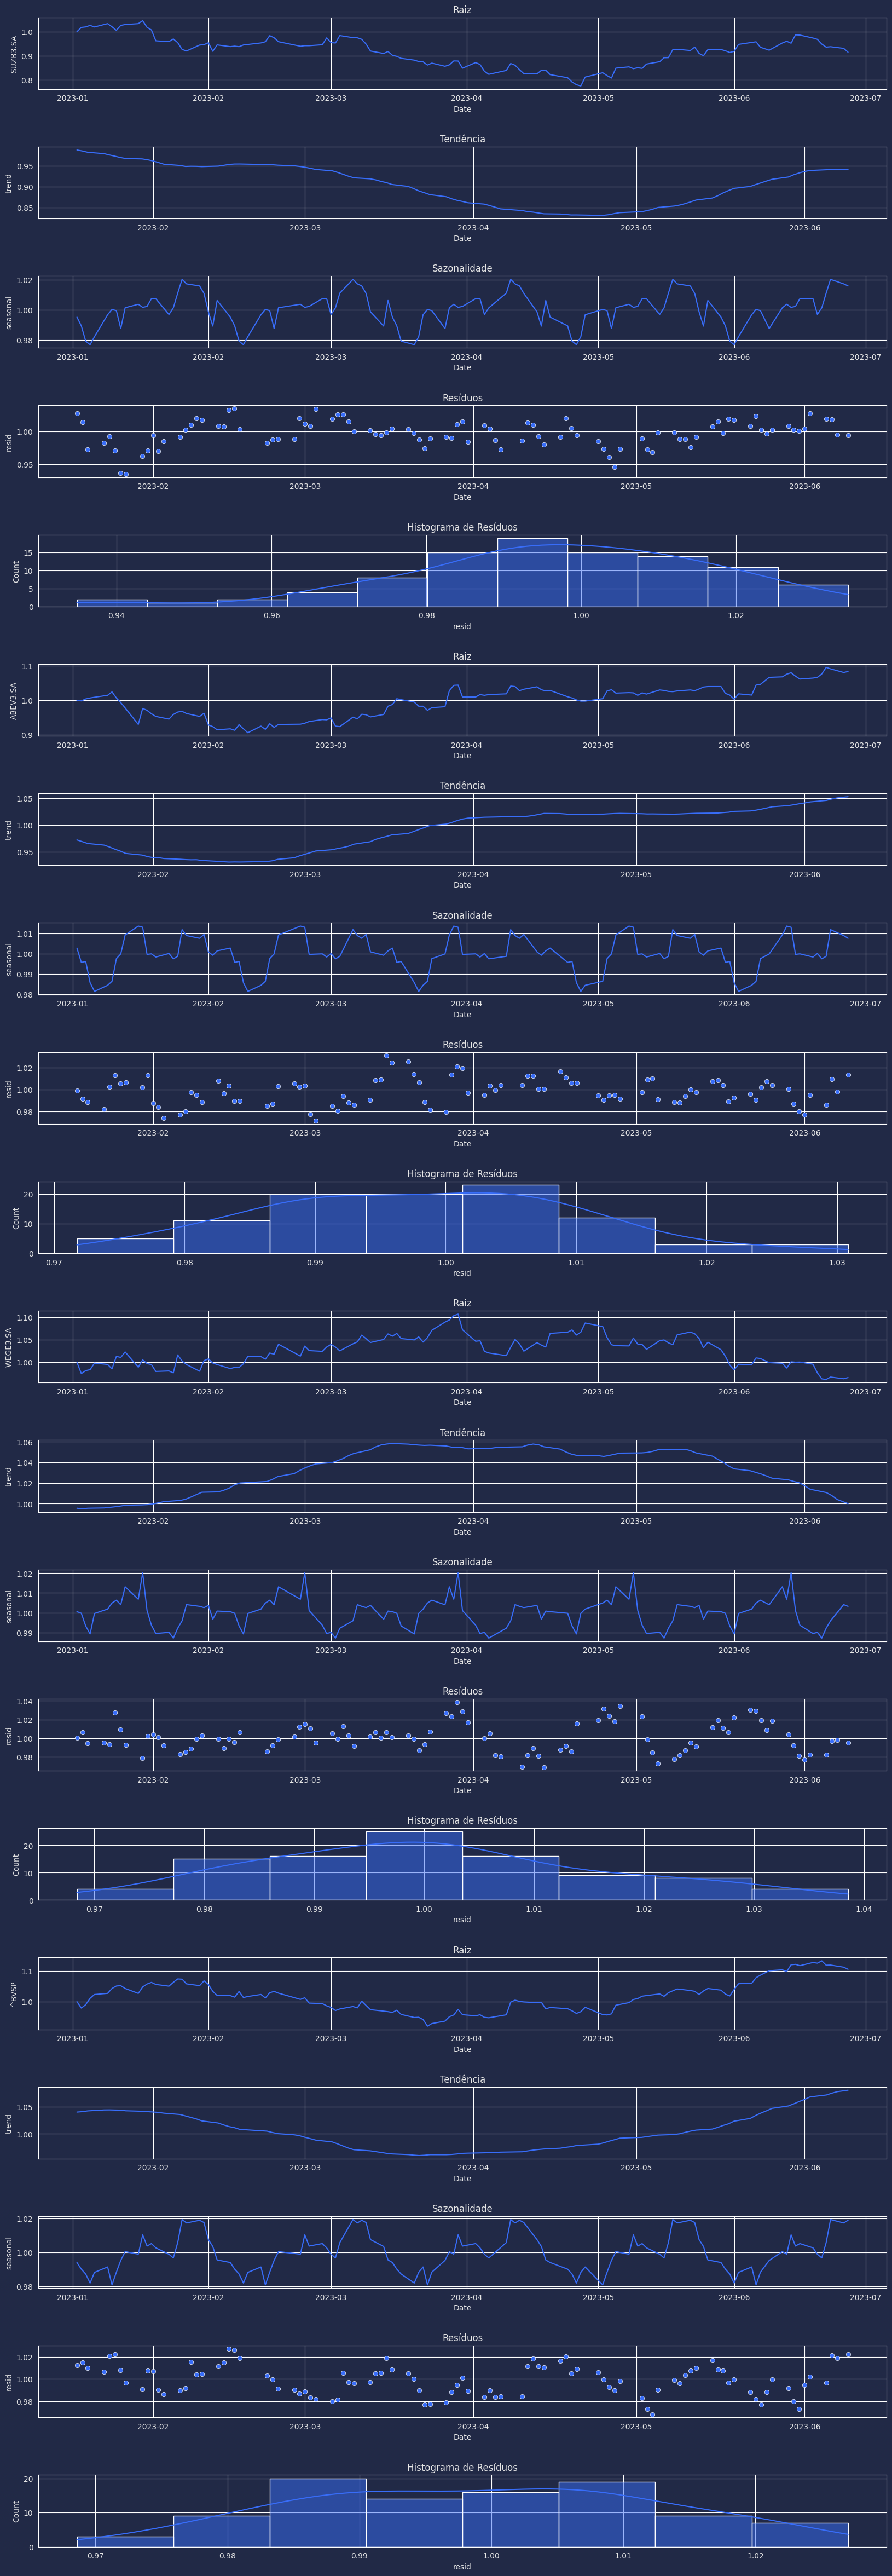

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
data_portifolio.index =pd.to_datetime(data_portifolio.index)

fig_,axs_=plt.subplots(int(4*data_portifolio.shape[1]+data_portifolio.shape[1]),1,figsize=(20,60))
cont=0
sns.set_palette('rainbow')

for col_index in range(0,data_portifolio.shape[1]):
  series=data_portifolio.iloc[:,col_index]
  result = seasonal_decompose(series, model='multiplicative',period=25)
  sns.lineplot(data=result.observed,ax=axs_[cont])
  axs_[cont].set_title('Raiz')
  cont+=1
  sns.lineplot(data=result.trend,ax=axs_[cont])
  axs_[cont].set_title('Tendência')
  cont+=1
  sns.lineplot(data=result.seasonal,ax=axs_[cont])
  axs_[cont].set_title('Sazonalidade')
  cont+=1
  sns.scatterplot(data=result.resid,ax=axs_[cont])
  axs_[cont].set_title('Resíduos')
  cont+=1
  sns.histplot(data=result.resid,ax=axs_[cont],kde=True)
  axs_[cont].set_title('Histograma de Resíduos')
  cont+=1
plt.subplots_adjust(hspace = 0.8)
# result.resid.dropna().hist()


In [29]:
data_portifolio.index[0]

Timestamp('2023-01-02 00:00:00')

In [33]:
data_raiz={name:pd.DataFrame() for name in carteira}

for df_name in list(d.keys()):
  data_raiz[df_name] = pdr.get_data_yahoo(df_name,start=start_date,end=end)
  data_raiz[df_name]['Simple Return']=(data_raiz[df_name]['Adj Close']/data_raiz[df_name]['Adj Close'].shift(1))-1


data_zero={name:pd.DataFrame() for name in carteira}
data_acoes=pd.DataFrame()
for df_name in list(d.keys()):
  data_zero[df_name]=pdr.get_data_yahoo(df_name,start=start_date,end=end)
  data_acoes[df_name]=data_zero[df_name]['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [34]:
return_portifolio=pd.DataFrame()
for df_name in list(d.keys()):
  return_portifolio[df_name]=data_raiz[df_name]['Simple Return']

Text(0.5, 1.0, 'Distribuição de Retornos Simples')

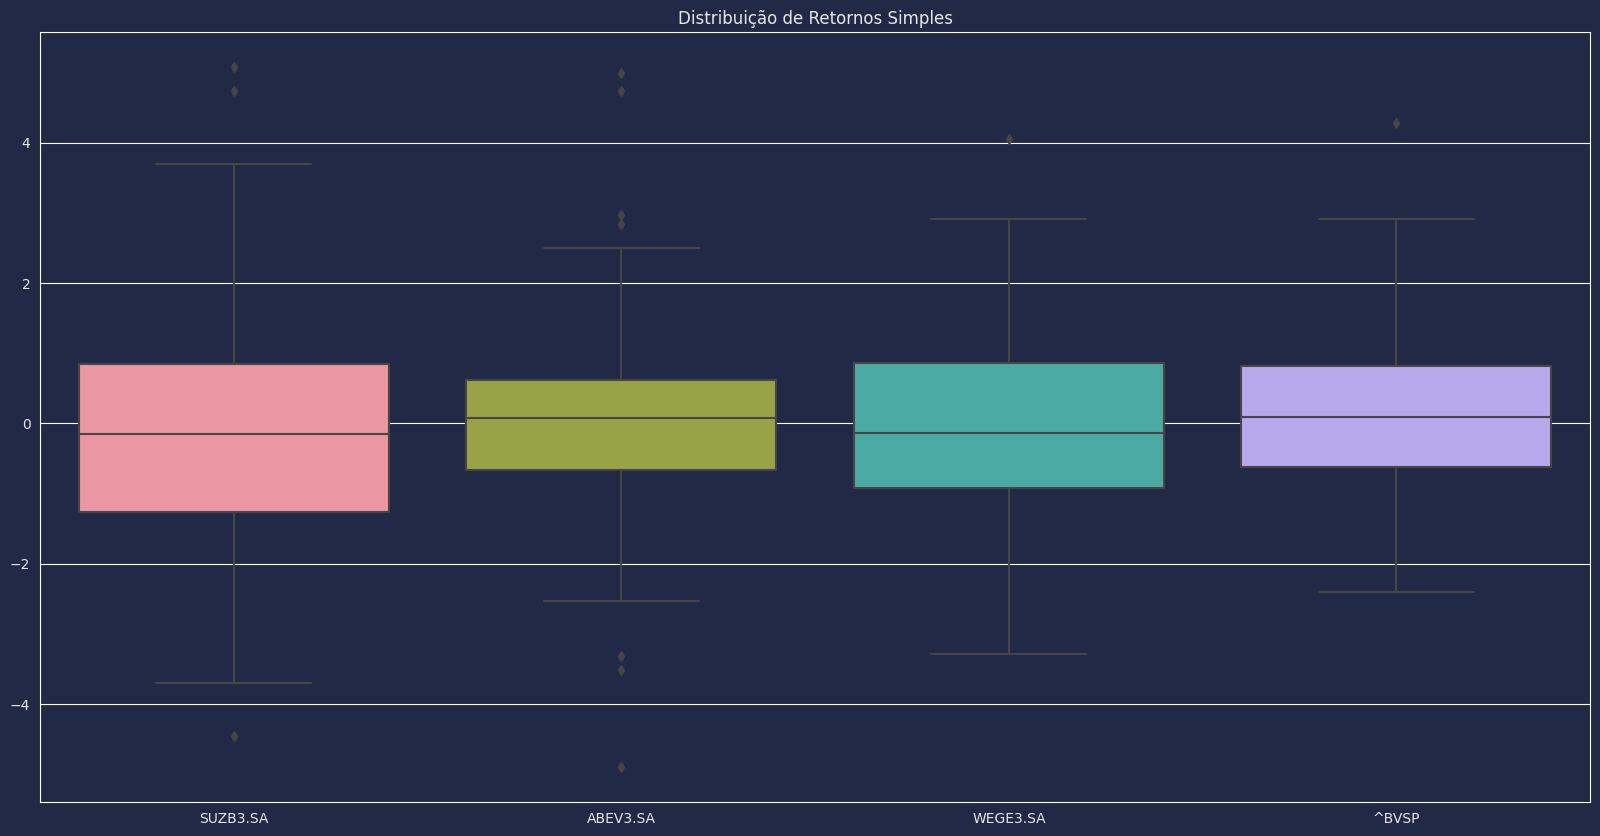

In [35]:
fig2,ax2=plt.subplots(figsize=(20,10))
sns.set_palette('Spectral',n_colors=True)

# sns.violinplot(data=return_portifolio*100)
sns.boxplot(data=return_portifolio*100)
plt.title("Distribuição de Retornos Simples")

In [36]:
#Retorno de cada ação
retornos_=return_portifolio.mean()*days*100
print("================RETORNO=ANUAL=================")
print(retornos_)
print("===============VOLATILIDADE=============")
print(return_portifolio.std())

retornos_[retornos_>0].index

================RETORNO=ANUAL=================
SUZB3.SA    -7.308937
ABEV3.SA     9.651905
WEGE3.SA    -2.527026
^BVSP       11.416858
dtype: float64
===============VOLATILIDADE=============
SUZB3.SA    0.018009
ABEV3.SA    0.013390
WEGE3.SA    0.013205
^BVSP       0.011744
dtype: float64


Index(['ABEV3.SA', '^BVSP'], dtype='object')

In [37]:
return_portifolio.dropna().head(2)

,SUZB3.SA,ABEV3.SA,WEGE3.SA,^BVSP
Date,,,,
2023-01-03,0.017762,-0.001409,-0.024934,-0.020775
2023-01-04,0.002006,0.005646,0.006729,0.011213


In [38]:
return_portifolio=return_portifolio[carteira[:-1]]
data_portifolio=data_portifolio[carteira[:-1]]

In [39]:
pesos=np.array([1/(return_portifolio.shape[1]-1)]*return_portifolio.shape[1])

In [40]:
pesos=np.array([1/return_portifolio.shape[1]]*return_portifolio.shape[1])

In [41]:
#retorno anual médio
#anual= 250
retornos_=return_portifolio.mean()*days*100
retornos_

SUZB3.SA   -7.308937
ABEV3.SA    9.651905
WEGE3.SA   -2.527026
dtype: float64

In [42]:
"Retorno da carteira: " + str(round(np.dot(pesos,retornos_),3))+'%'

'Retorno da carteira: -0.061%'

In [43]:
pesos2=np.array([1/return_portifolio.shape[1]]*return_portifolio.shape[1])#,0.4])
"Retorno da carteira: " + str(round(np.dot(pesos2,retornos_),3))+'%'

'Retorno da carteira: -0.061%'

<Axes: title={'center': 'PREÇO DAS AÇÕES'}>

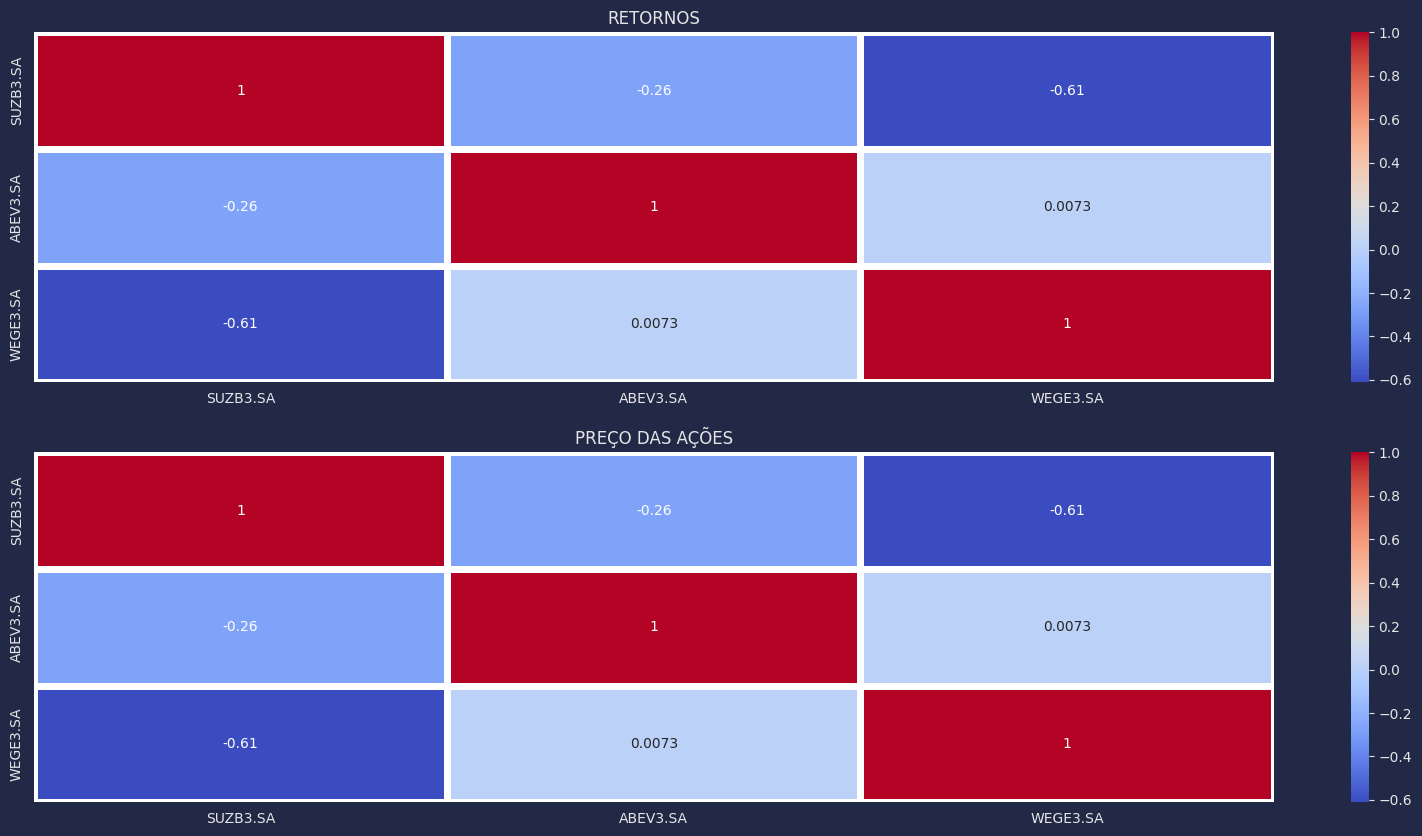

In [44]:
data_portifolio.corr()
sns.set_palette("inferno")
fig,axis=plt.subplots(2,1,figsize=(20,10))
sns.heatmap(data=data_portifolio.corr(),annot=True,cmap="coolwarm",linecolor="white",linewidths=5,ax=axis[0])
axis[0].set_title("RETORNOS")
axis[1].set_title("PREÇO DAS AÇÕES")
sns.heatmap(data=data_acoes[carteira[:-1]].corr(),annot=True,cmap="coolwarm",linecolor="white",linewidths=5,ax=axis[1])

In [45]:
#calculo de volatilidade da carteira
pesos=np.array([1/return_portifolio.shape[1]]*return_portifolio.shape[1])#0.4])
volat=np.dot(pesos.T,np.dot(data_portifolio.cov()*days,pesos))**0.5
volat

0.21031330253850794

In [46]:
#volatilidade da bolsa
dados=data_raiz['^BVSP']['Adj Close']/data_raiz['^BVSP']['Adj Close'].iloc[0]
volatilidade_GSPC=dados.std()*np.sqrt(days)
volatilidade_GSPC

0.5591103433091232

### Fronteira de Markowitiz

In [47]:
#dados
data_acoes=data_acoes[carteira[:-1]]

In [48]:
data_log_return=np.log(data_acoes/data_acoes.shift(1))
data_log_return

,SUZB3.SA,ABEV3.SA,WEGE3.SA
Date,,,
2023-01-02,NaN,NaN,NaN
2023-01-03,0.017606,-0.001410,-0.025251
2023-01-04,0.002004,0.005630,0.006707
2023-01-05,0.006187,0.002803,0.002137
2023-01-06,-0.006387,0.002097,0.014568
...,...,...,...
2023-06-21,-0.020444,0.009204,-0.013624
2023-06-22,-0.013429,0.017516,-0.001373
2023-06-23,0.001743,-0.003866,0.005479


In [49]:
#retorno anual
data_log_return.mean()*days

SUZB3.SA   -0.093463
ABEV3.SA    0.085228
WEGE3.SA   -0.036241
dtype: float64

,SUZB3.SA,ABEV3.SA,WEGE3.SA
SUZB3.SA,1.000000,0.086057,0.162678
ABEV3.SA,0.086057,1.000000,0.310695
WEGE3.SA,0.162678,0.310695,1.000000


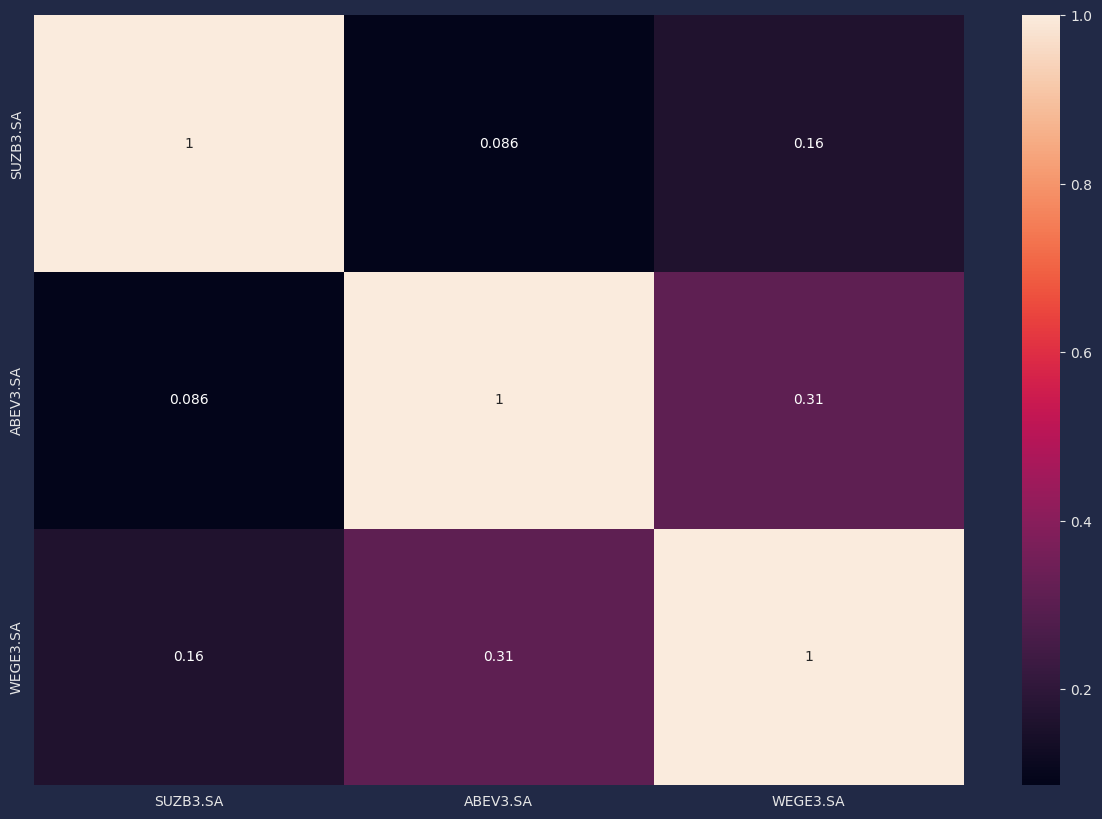

In [50]:
fig,axs=plt.subplots(figsize=(15,10))
sns.heatmap(data_log_return.corr(),annot=True)
data_log_return.corr()

In [51]:
combinacoes_pesos=1000


weights_matrix=np.zeros((combinacoes_pesos,pesos.shape[0]))
for i in range(0,combinacoes_pesos):
  number_random=np.random.random(pesos.shape[0])
  number_random/=sum(number_random)
  weights_matrix[i][:]=number_random

##          **Portifolio return**


In [52]:
print(data_log_return.mean())
means_=np.array(data_log_return[return_portifolio.columns.tolist()].mean())
means_

SUZB3.SA   -0.000736
ABEV3.SA    0.000671
WEGE3.SA   -0.000285
dtype: float64


array([-0.00073593,  0.00067109, -0.00028536])

In [53]:
retornos_=np.dot(weights_matrix,means_)*days

##         **Portifolio Variance**

In [54]:
variance=np.zeros((combinacoes_pesos,1))
for i in range(0, combinacoes_pesos):
  variance[i][:]=np.dot(weights_matrix[i][:],np.dot(data_log_return.cov()*days,\
                                      weights_matrix[i][:].T))

In [55]:
#like desvio padrao
volatilidade=np.sqrt(variance)

<ipython-input-56-8f458e7ee847>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['Volatilidade'],y=df['Retorno'], palette='inferno')


<Axes: xlabel='Volatilidade', ylabel='Retorno'>

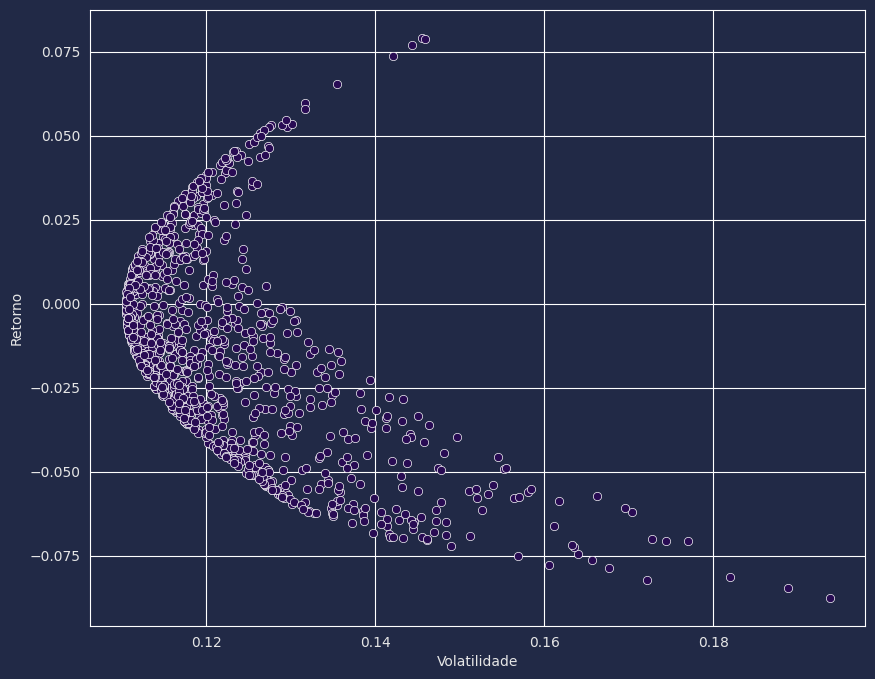

In [56]:
df=pd.DataFrame()
df['Volatilidade']=volatilidade.reshape(1,-1)[0]
df['Retorno']=retornos_

#df.plot(x="Volatilidade",y='Retorno', kind="scatter",figsize=(10,6))
plt.subplots(figsize=(10,8))
plt.style.use("dark_background")
sns.scatterplot(x=df['Volatilidade'],y=df['Retorno'], palette='inferno')

In [57]:
weights_matrix[[df[(df["Retorno"]>0.05)&(df['Volatilidade']<0.20)].index]].round(2)

<ipython-input-57-07be4e923207>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  weights_matrix[[df[(df["Retorno"]>0.05)&(df['Volatilidade']<0.20)].index]].round(2)


array([[0.09, 0.76, 0.15],
       [0.  , 0.95, 0.05],
       [0.03, 0.95, 0.02],
       [0.01, 0.84, 0.15],
       [0.07, 0.75, 0.18],
       [0.05, 0.93, 0.02],
       [0.15, 0.8 , 0.05],
       [0.03, 0.96, 0.01],
       [0.04, 0.81, 0.15],
       [0.04, 0.76, 0.2 ],
       [0.09, 0.77, 0.14],
       [0.13, 0.8 , 0.08],
       [0.08, 0.76, 0.16],
       [0.15, 0.81, 0.04],
       [0.11, 0.83, 0.07],
       [0.11, 0.8 , 0.09]])

In [58]:
data_pesos=pd.concat([df,pd.DataFrame(weights_matrix, columns=carteira[:-1])],axis=1)

In [59]:
import plotly.express as px
px.scatter(data_pesos,x='Volatilidade',y='Retorno',hover_data=carteira[:-1],template = "plotly_dark",title='Fronteira de Markovitz')

In [60]:
data_pesos[(data_pesos['Volatilidade']<0.26)&(data_pesos['Retorno']>-0.05)]

writer = pd.ExcelWriter('Fronteira_Markowitz_.xlsx', engine='xlsxwriter')
data_pesos[(data_pesos['Volatilidade']<0.26)&(data_pesos['Retorno']>-0.05)].to_excel(writer,sheet_name='1',index=False)
writer.save()
from google.colab import files
files.download('Fronteira_Markowitz_.xlsx')

<ipython-input-60-ac564cbdc7d5>:5: FutureWarning:

save is not part of the public API, usage can give unexpected results and will be removed in a future version



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>